In [401]:
import sympy
from sympy import Symbol

x = Symbol("x")
t = Symbol("t")
a = Symbol("a")
b = Symbol("b")

i = sympy.integrate(t**(a - 1) * (1-t)**(b-1), (t, 0, x))
i = i.simplify()
i

(-0**a + x**a*hyper((a, 1 - b), (a + 1,), x*exp_polar(2*I*pi)))/a

In [402]:
1/4.5

0.2222222222222222

In [407]:
bi = float(i.evalf(subs={a:4.5, b:0.5, x: 0.7}) / beta(4.5, 0.5))
bi

0.08112618884584062

In [405]:
%timeit float(i.evalf(subs={a:4.5, b:0.5, x: 0.7}))
%timeit betainc(4.5, 0.5, 0.7)

894 μs ± 3.88 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.4 μs ± 7.01 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [345]:
import numpy as np
from scipy.special import beta, betainc, gamma, hyp2f1, factorial, poch
betainc(4.5, 0.5, 0.7)

np.float64(0.08112618884584057)

In [399]:
betainc(4.5, 0.5, 0.7) - bi

np.float64(-0.0361806141683976)

In [397]:
a = 4.5
b = 0.5
x = 0.75
x**a / a * hyp2f1(a, 1 - b, a + 1, x) / beta(a, b)

np.float64(0.11730680301423814)

In [395]:
x**a / a * sum(
    poch(a, n) * poch(1 - b, n) / poch(a + 1, n) * x**n / factorial(n)
    for n in range(90)
) / beta(a, b)

/tmp/ipykernel_8825/1670618085.py:2: RuntimeWarning: overflow encountered in scalar multiply
  poch(a, n) * poch(1 - b, n) / poch(a + 1, n) * x**n / factorial(n)


np.float64(inf)

In [396]:
x**a / a * sum(
    gamma(a + n) / gamma(a) * gamma(1 - b + n) / gamma(1 - b) / gamma(a + 1 + n) * gamma(a + 1) / factorial(n) * x**n 
    for n in range(90)
) / beta(a, b)

/tmp/ipykernel_8825/2295773376.py:2: RuntimeWarning: invalid value encountered in scalar divide
  gamma(a + n) / gamma(a) * gamma(1 - b + n) / gamma(1 - b) / gamma(a + 1 + n) * gamma(a + 1) / factorial(n) * x**n


np.float64(nan)

In [389]:
bi = x**a * gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b) * sum(
    gamma(a + n) * gamma(1 - b + n) / gamma(a + 1 + n) * x**n / factorial(n)
    for n in range(90)
)
bi

np.float64(0.1173068030142338)

In [390]:
bi = x**a * gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b) * sum(
    gamma(-b + n + 1) / gamma(n + 1) / (a + n) * x**n
    for n in range(90)
)
bi

np.float64(0.1173068030142338)

In [391]:
bi = x**a * np.sin(np.pi * b) * gamma(a + b) / gamma(a) / np.pi * sum(
    gamma(-b + n + 1) / (a + n) / gamma(n + 1) * x**n
    for n in range(90)
)
bi

np.float64(0.1173068030142338)

In [392]:
bi - betainc(a, b, x)

np.float64(-4.371503159461554e-15)

In [393]:
bi = x**a * np.sin(np.pi * b) * gamma(a + b) / gamma(a) / np.pi * sum(
    gammaprops[n] / (a + n) * x**n
    for n in range(1000)
)
bi

np.float64(0.11730680301423817)

In [385]:
bi - betainc(a, b, x)

np.float64(-1.6653345369377348e-16)

In [291]:
(gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b)).simplify()

sin(pi*b)*gamma(a + b)/(pi*gamma(a))

In [308]:
x = Symbol("x")
n = Symbol("n")
a = Symbol("a")
b = Symbol("b")
from sympy import gamma, factorial
(gamma(a + n) * gamma(1 - b + n) / gamma(a + 1 + n) / factorial(n) * x**n).simplify()

x**n*gamma(-b + n + 1)/((a + n)*gamma(n + 1))

<Axes: >

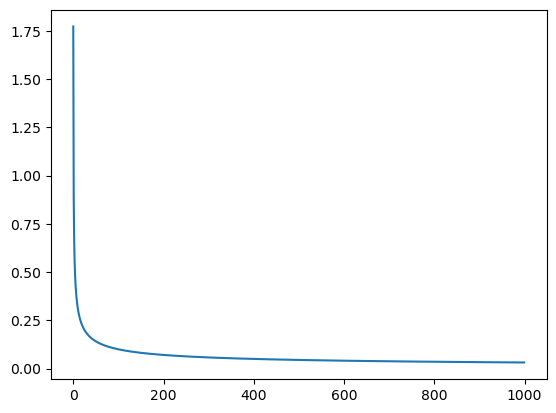

In [323]:
gammaprops = [
    float((gamma(n+1-b) / gamma(n+1)).evalf(subs={b: 0.5, n: nn}))
    for nn in range(1000)
]
import pandas
pandas.Series(gammaprops).plot()

In [324]:
gammaprops

[1.772453850905516,
 0.886226925452758,
 0.6646701940895685,
 0.5538918284079738,
 0.48465534985697706,
 0.43618981487127934,
 0.39984066363200604,
 0.3712806162297199,
 0.3480755777153624,
 0.3287380456200645,
 0.3123011433390613,
 0.2981056368236494,
 0.285684568622664,
 0.27469670059871537,
 0.2648861041487613,
 0.25605656734380255,
 0.24805479961430874,
 0.2407590702138879,
 0.2340713182635021,
 0.22791154673025205,
 0.22221375806199575,
 0.2169229542986149,
 0.21199288715546458,
 0.20738434613034576,
 0.2030638389192969,
 0.19900256214091097,
 0.1951755897920473,
 0.19156122701812048,
 0.18814049082136833,
 0.18489668925548267,
 0.1818150777678913,
 0.17888257651357048,
 0.17608753625554593,
 0.17341954328197706,
 0.1708692558807715,
 0.1684282665110462,
 0.16608898503172612,
 0.16384453928805415,
 0.16168869008689554,
 0.15961575816270457,
 0.15762056118567075,
 0.15569835921999184,
 0.15384480732451575,
 0.15205591421609116,
 0.15032800609999922,
 0.14865769492111033,
 0.1470418